In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# retina
%config InlineBackend.figure_format = 'retina'

In [20]:
in_sample_month = 8
# read ow_rsq_table, afs_rsq_table, ow_summary, afs_
with open("./impact_model_summary/ow_rsq_table_" + str(in_sample_month) +".pkl", 'rb') as f:
    ow_rsq_table = pickle.load(f)
with open("./impact_model_summary/ow_summary_" + str(in_sample_month) +".pkl", 'rb') as f:
    ow_summary = pickle.load(f)    
with open("./impact_model_summary/afs_rsq_table_" + str(in_sample_month) +".pkl", 'rb') as f:
    afs_rsq_table = pickle.load(f)
with open("./impact_model_summary/afs_summary_" + str(in_sample_month) +".pkl", 'rb') as f:
    afs_summary = pickle.load(f)

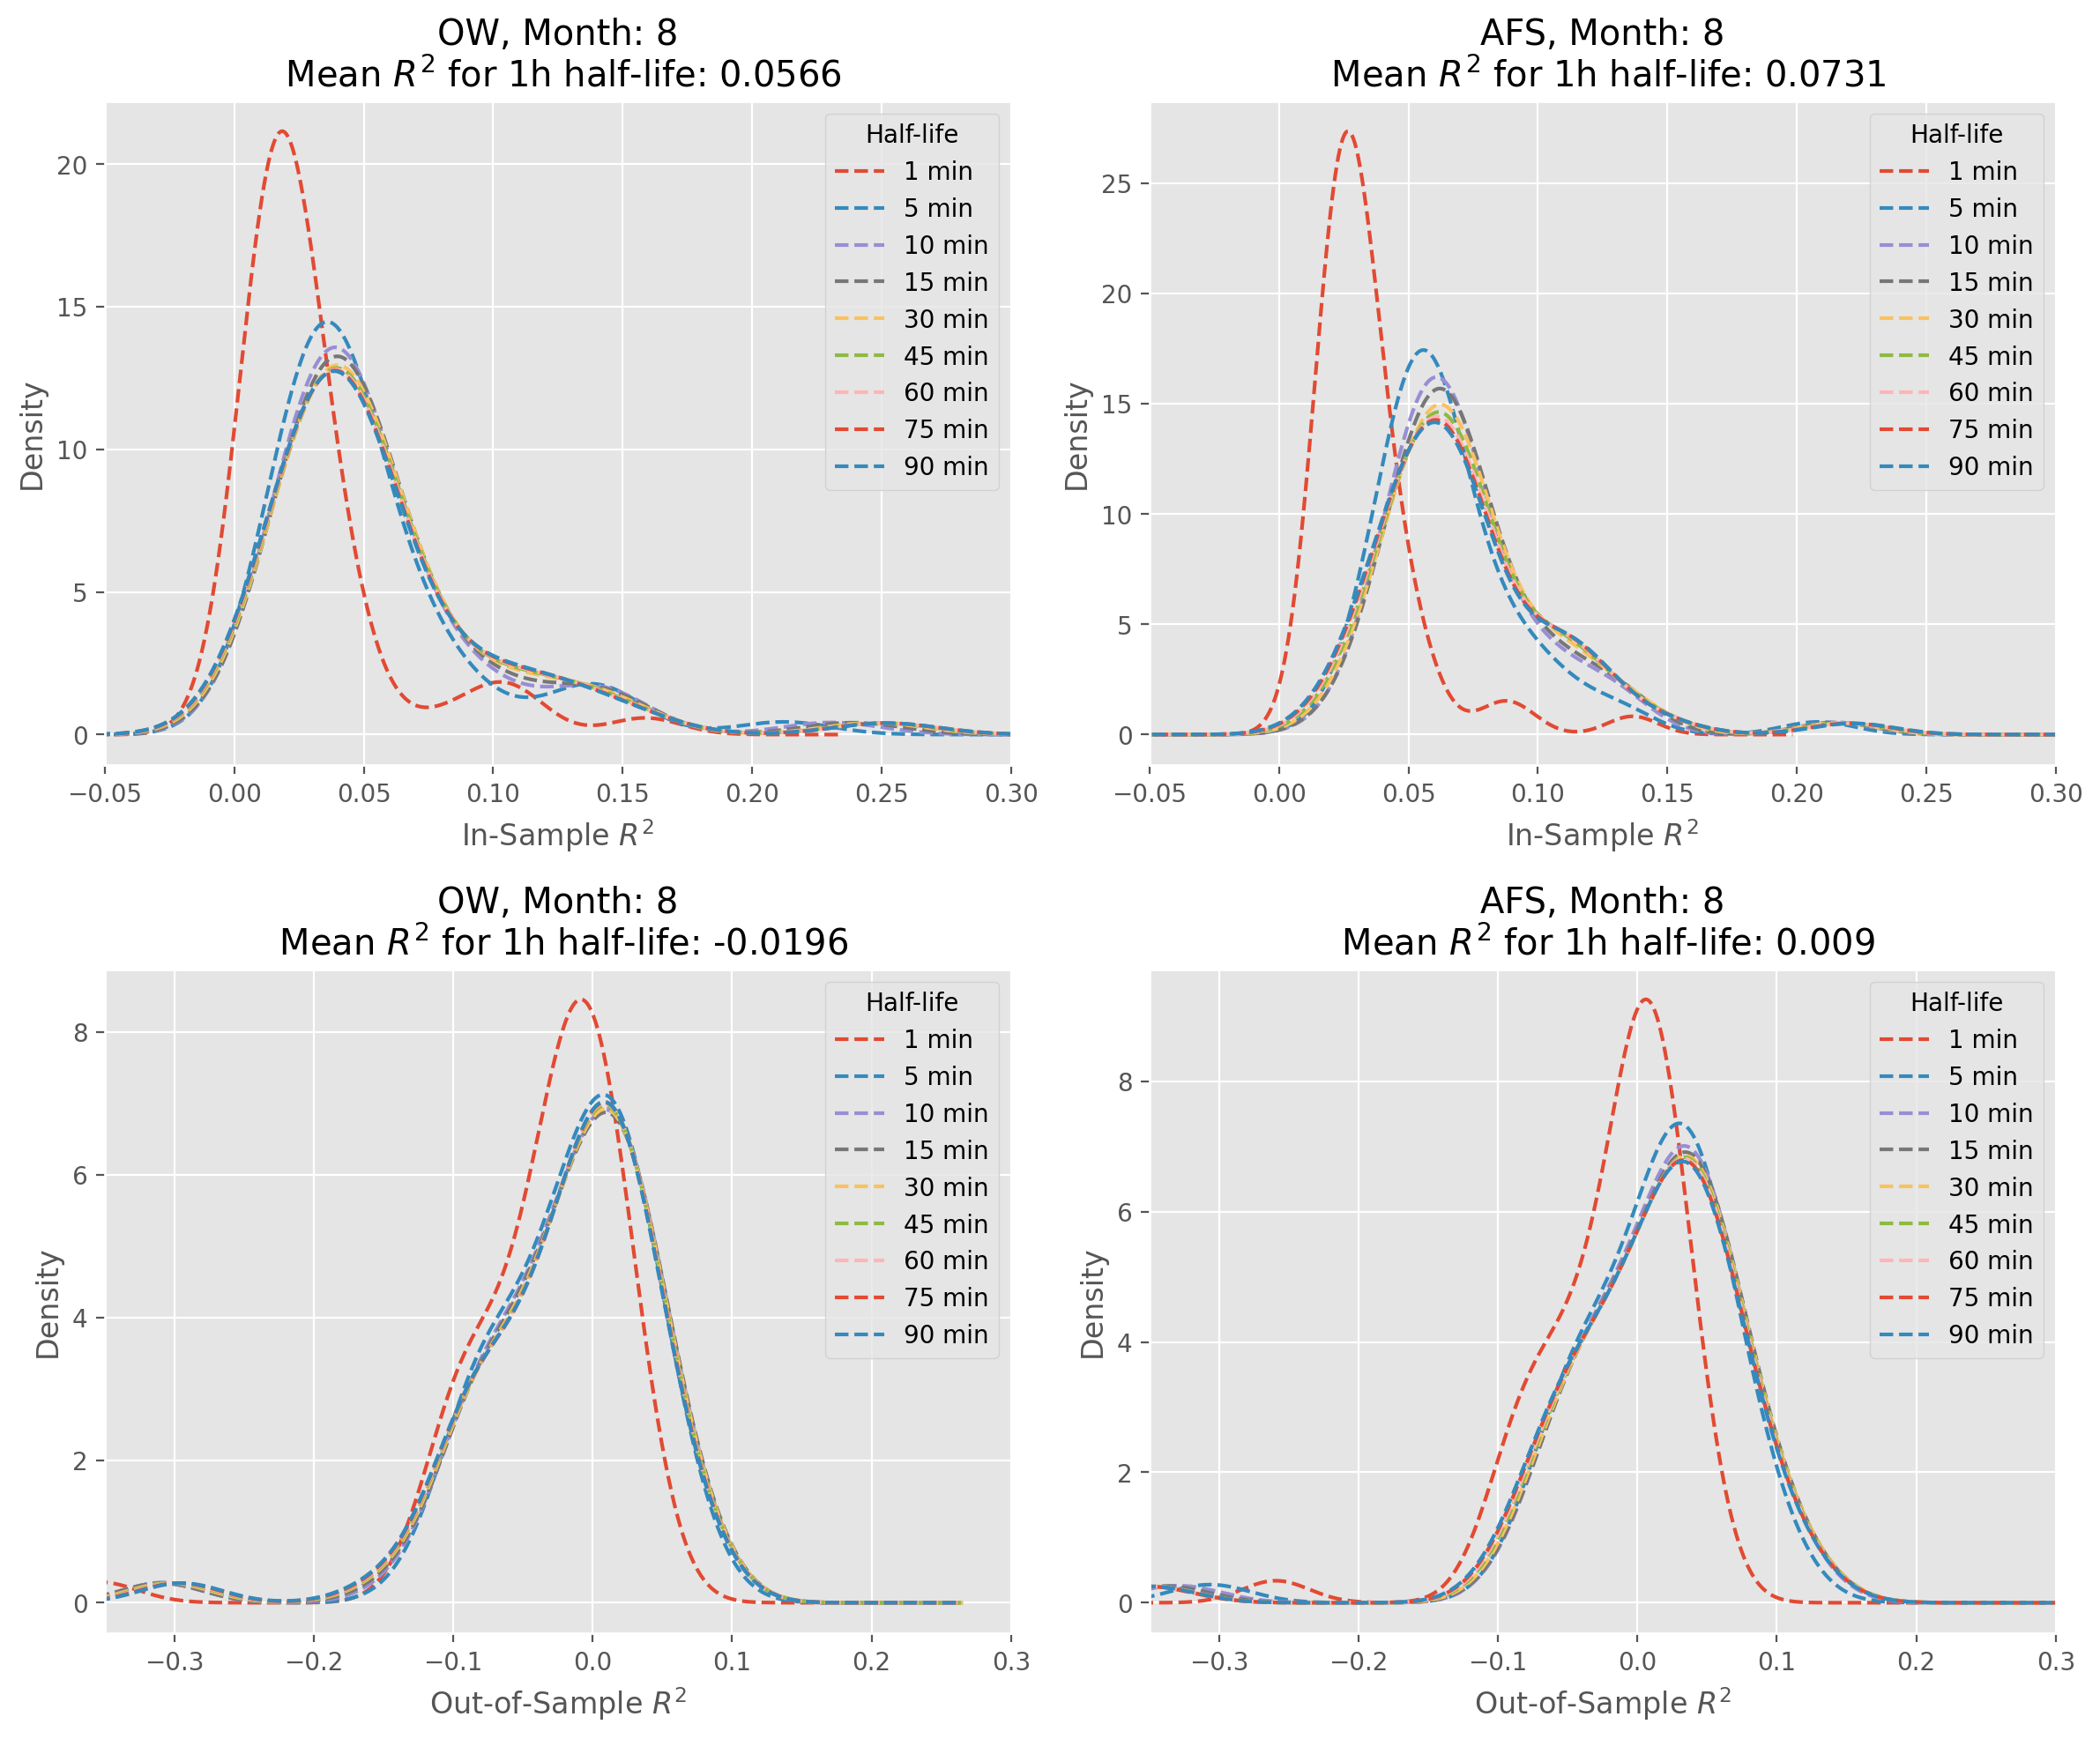

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
xlim = (0, 0.3)
# ow
rsq_table = ow_rsq_table
mean_info = rsq_table.groupby("half_life").mean('is_rsq', 'oos_rsq')
half_life_list = rsq_table['half_life'].unique()
for i in range(len(half_life_list)):
    half_life = half_life_list[i]
    is_rsq = rsq_table[rsq_table['half_life'] == half_life]['is_rsq']
    oos_rsq = rsq_table[rsq_table['half_life'] == half_life]['oos_rsq']
    is_rsq.plot.kde(ls='--', xlim=(-0.05, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[0,0])
    oos_rsq.plot.kde(ls='--', xlim=(-0.35, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[1,0])
ax[0,0].set_xlabel('In-Sample $R^2$')
ax[0,0].legend(title='Half-life')
ax[0,0].set_title('OW, Month: ' + str(in_sample_month)
                  + "\n Mean $R^2$ for 1h half-life: " + str(round(mean_info.loc[3600]['is_rsq'], 4)))
ax[1,0].set_xlabel('Out-of-Sample $R^2$')
ax[1,0].legend(title='Half-life')
ax[1,0].set_title('OW, Month: ' + str(in_sample_month)
                  + "\n Mean $R^2$ for 1h half-life: " + str(round(mean_info.loc[3600]['oos_rsq'], 4)))

# afs
rsq_table = afs_rsq_table
mean_info = rsq_table.groupby("half_life").mean('is_rsq', 'oos_rsq')
half_life_list = rsq_table['half_life'].unique()
for i in range(len(half_life_list)):
    half_life = half_life_list[i]
    is_rsq = rsq_table[rsq_table['half_life'] == half_life]['is_rsq']
    oos_rsq = rsq_table[rsq_table['half_life'] == half_life]['oos_rsq']
    is_rsq.plot.kde(ls='--', xlim=(-0.05, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[0,1])
    oos_rsq.plot.kde(ls='--', xlim=(-0.35, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[1,1])
ax[0,1].set_xlabel('In-Sample $R^2$')
ax[0,1].legend(title='Half-life')
ax[0,1].set_title('AFS, Month: ' + str(in_sample_month)
                  + "\n Mean $R^2$ for 1h half-life: " + str(round(mean_info.loc[3600]['is_rsq'], 4)))
ax[1,1].set_xlabel('Out-of-Sample $R^2$')
ax[1,1].legend(title='Half-life')
ax[1,1].set_title('AFS, Month: ' + str(in_sample_month)
                  + "\n Mean $R^2$ for 1h half-life: " + str(round(mean_info.loc[3600]['oos_rsq'], 4)))

plt.tight_layout()
plt.savefig("./Plots/ow_afs_rsq_" + str(in_sample_month) +".png", dpi=250)
    


In [50]:
in_sample_month = 8
# read ow_rsq_table, afs_rsq_table, ow_summary, afs_summary
with open("./impact_model_summary/ow_summary_" + str(in_sample_month) +".pkl", 'rb') as f:
    ow_summary = pickle.load(f)
    print(ow_summary.sort_values('oos_rsq', ascending=False).iloc[0:5])
    print(ow_summary.sort_values('oos_rsq', ascending=False).iloc[-5:])
with open("./impact_model_summary/afs_summary_" + str(in_sample_month) +".pkl", 'rb') as f:
    afs_summary = pickle.load(f)
    print(afs_summary.sort_values('oos_rsq', ascending=False).iloc[0:5])
    print(afs_summary.sort_values('oos_rsq', ascending=False).iloc[-5:])

       beta_estimate  alpha_estimate    is_rsq   oos_rsq  half_life
stock                                                              
ALGN      169.483402        0.000648  0.074021  0.076371       3600
AMD       199.965584        0.000826  0.136899  0.067681       3600
AAL       106.595530        0.000739  0.056966  0.062143       3600
ADS       147.661733        0.000572  0.060846  0.046819       3600
ADBE       77.834922        0.000541  0.014222  0.046650       3600
       beta_estimate  alpha_estimate    is_rsq   oos_rsq  half_life
stock                                                              
AEP        84.008889        0.000411  0.029585 -0.091999       3600
AIZ       130.894692        0.000469  0.059351 -0.095973       3600
AMZN      295.756520        0.000435  0.134253 -0.102004       3600
ABBV      258.290250        0.000535  0.092632 -0.144587       3600
AMGN      391.032254        0.000497  0.250795 -0.298601       3600
       beta_estimate  alpha_estimate    is_rsq  

In [56]:
stock_list = ['AMD', 'AAPL', 'AMZN', 'ALL']
ow_rsq_table[ow_rsq_table['stock']=="AAPL"]

,stock,beta_estimate,alpha_estimate,is_rsq,oos_rsq,half_life
3,AAPL,116.518300,0.000321,0.049225,0.069145,60
52,AAPL,130.314285,0.000313,0.073810,0.104718,300
101,AAPL,127.061173,0.000312,0.073275,0.106586,600
150,AAPL,123.535018,0.000312,0.070735,0.105416,900
199,AAPL,116.960217,0.000314,0.065033,0.102915,1800
248,AAPL,113.432980,0.000315,0.061738,0.102253,2700
297,AAPL,111.186949,0.000315,0.059609,0.102117,3600
346,AAPL,109.633352,0.000316,0.058136,0.102088,4500
395,AAPL,108.502966,0.000317,0.057070,0.102060,5400


In [44]:
# in_sample_month = 11
# # read ow_rsq_table, afs_rsq_table, ow_summary, afs_summary
# with open("./impact_model_summary/ow_rsq_table_" + str(in_sample_month) +".pkl", 'rb') as f:
#     ow_rsq_table = pickle.load(f)
#     ow_summary = ow_rsq_table[ow_rsq_table['half_life']==3600].set_index('stock')
#     with open("./impact_model_summary/ow_summary_" + str(in_sample_month) +".pkl", 'wb') as f:
#         pickle.dump(ow_summary, f)
# with open("./impact_model_summary/afs_rsq_table_" + str(in_sample_month) +".pkl", 'rb') as f:
#     afs_rsq_table = pickle.load(f)
#     afs_summary = afs_rsq_table[afs_rsq_table['half_life']==3600].set_index('stock')
#     with open("./impact_model_summary/afs_summary_" + str(in_sample_month) +".pkl", 'wb') as f:
#         pickle.dump(afs_summary, f)

In [93]:
stock_list =['AAPL', 'AMZN']

In [101]:
table_to_show = pd.DataFrame(columns=['stock', 'beta_estimate', 'alpha_estimate', 'is_rsq', 'oos_rsq', 'half_life', 'month'])
table_to_show
for in_sample_month in (5, 8, 11):
    with open("./impact_model_summary/ow_summary_" + str(in_sample_month) +".pkl", 'rb') as f:
        table_temp = pickle.load(f).loc[stock_list].reset_index()
        table_temp['month'] = in_sample_month
        table_to_show = pd.concat((table_to_show, table_temp), ignore_index=True)
table_to_show.sort_values('stock', inplace=True)
table_to_show.drop(columns=['beta_estimate', 'alpha_estimate'], inplace=True)

/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_7582/3556490907.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table_to_show = pd.concat((table_to_show, table_temp), ignore_index=True)


In [102]:
# convert to latex
table_to_show.to_latex(index=False)

'\\begin{tabular}{lrrll}\n\\toprule\nstock & is_rsq & oos_rsq & half_life & month \\\\\n\\midrule\nAAPL & 0.157565 & -0.127719 & 3600 & 5 \\\\\nAAPL & 0.117269 & 0.033901 & 3600 & 8 \\\\\nAAPL & 0.059609 & 0.102117 & 3600 & 11 \\\\\nAMZN & 0.181395 & 0.128970 & 3600 & 5 \\\\\nAMZN & 0.134253 & -0.102004 & 3600 & 8 \\\\\nAMZN & 0.076633 & 0.061366 & 3600 & 11 \\\\\n\\bottomrule\n\\end{tabular}\n'